# 1. Popularity Based Recommendation System

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

## About the Dataset (jokes.csv)



 
1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").
  
2. One row per user
3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.



### Q1. Read the data (jokes.csv)

In [2]:
jokes_df = pd.read_csv('Dataset - jokes.csv')
jokes_df.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [3]:
jokes_df.shape

(24983, 101)

### Q2. Create new Dataframe `ratings` starting from column `joke1` and consider first 200 rows only



In [4]:
ratings = jokes_df.iloc[:200, 1:]
ratings.shape

(200, 100)

In [5]:
ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


### Q3. Preprocess `ratings`


*   Verify presence of null values
*   Replace null with 0



In [6]:
ratings.isnull().sum().sum()

0

In [7]:
ratings.replace(99, 0, inplace = True)

### Q4. Find mean for each joke


*   Find mean of 100 jokes



In [8]:
mean_ratings = ratings.mean(axis = 0)

In [9]:
mean_ratings = pd.DataFrame(mean_ratings)

In [10]:
mean_ratings.head()

,0
Joke1,0.53005
Joke2,0.59390
Joke3,0.23765
Joke4,-0.70100
Joke5,-0.03790


### Q5. List most popular 10 jokes

In [11]:
ratings.mean().sort_values(ascending=False).head(10)

Joke50    4.05540
Joke36    3.61150
Joke53    3.57150
Joke35    3.22315
Joke29    3.18995
Joke27    3.05240
Joke62    2.86185
Joke49    2.85000
Joke32    2.77955
Joke31    2.65710
dtype: float64

#2. Collaborative Filtering based Recommendation System

## About the Dataset

This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0.

Reference: http://www2.informatik.uni-freiburg.de/~cziegler/BX/

#### Execute below cells to read the datasets

In [12]:
books = pd.read_csv("Dataset -books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']


users = pd.read_csv('Dataset- users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

ratings = pd.read_csv('Dataset - ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


# Q1. Explore the Dataset

1.   Check shape of all the datasets
2.   Print Columns in all the datasets
3.   Remove last 3 columns of `books` ('imageUrlS', 'imageUrlM', 'imageUrlL')and verify



In [13]:
print('Books Shape :-', books.shape, '\nUsers Shape :-', users.shape, '\nRatings Shape :-', ratings.shape)

Books Shape :- (271360, 8) 
Users Shape :- (278858, 3) 
Ratings Shape :- (1149780, 3)


In [14]:
print('Books Columns :-',books.columns, '\n\nUsers Columns :-', users.columns, '\n\nRatings Columns :-', ratings.columns)

Books Columns :- Index(['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher',
       'imageUrlS', 'imageUrlM', 'imageUrlL'],
      dtype='object') 

Users Columns :- Index(['userID', 'Location', 'Age'], dtype='object') 

Ratings Columns :- Index(['userID', 'ISBN', 'bookRating'], dtype='object')


In [15]:
books.drop(['imageUrlS', 'imageUrlM', 'imageUrlL'], axis = 1, inplace = True)
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


# Q2. Data Preprocessing

### Create new DataFrame `ratings_new` with:
1.   Books from `ratings` Dataset, which exists in `books` Dataset (Intersect on ISBN)
2.   Ratings from `ratings` Dataset, which exists in `users` Dataset (Intersect on userID)


In [16]:
ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]
ratings_new = ratings_new[ratings.userID.isin(users.userID)]

In [17]:
ratings_new.shape

(1031136, 3)

In [18]:
ratings_new.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


# Q3. Data Preprocessing

### In new Dataframe, drop rows with 0 `bookRating`, since 0 is mentioned as 'Implicit Rating'.
#### (Check shape of new Dataframe before and after dropping 0s)


In [19]:
ratings_new.shape

(1031136, 3)

In [20]:
ratings_new.drop(ratings_new[ratings_new['bookRating']==0].index, inplace = True)

In [21]:
ratings_new.shape

(383842, 3)

# Q4. Check rating's distribution
### Plot a visual to identify highest occuring rating 

<AxesSubplot:xlabel='bookRating', ylabel='count'>

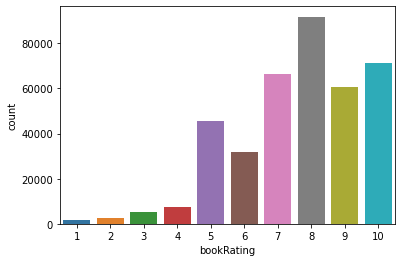

In [22]:
sns.countplot(ratings_new.bookRating)

# Q5. Build a User-Based Collaborative Filtering model



1.   Consider users who have rated atleast 100 books
2.   Transform data to surprise format
3.   Assure that only user, book and rating columns are present in the new dataset in surprise format



In [23]:
counts = ratings_new['userID'].value_counts()
ratings_final = ratings_new[ratings_new['userID'].isin(counts[counts >= 100].index)]

In [24]:
ratings_final.shape

(103271, 3)

In [25]:
#2 Transform data to surprise format
from surprise import Dataset,Reader
from surprise.model_selection import cross_validate
from surprise import NormalPredictor


reader = Reader(rating_scale=(1, 10))

In [26]:
data = Dataset.load_from_df(ratings_final, reader)
type(data)

surprise.dataset.DatasetAutoFolds

In [27]:
data.df

,userID,ISBN,bookRating
1456,277427,002542730X,10
1458,277427,003008685X,8
1461,277427,0060006641,10
1465,277427,0060542128,7
1474,277427,0061009059,9
...,...,...,...
1147587,275970,185649814X,7
1147592,275970,1860462588,8
1147599,275970,1886411077,6
1147611,275970,3411086211,10


# Q6. Apply SVD for user based filtering


1.   Split the data into train and test
2.   Train model on SVD
3.   Test Accuracy of the model




In [28]:
from surprise import SVD

In [29]:
from surprise.model_selection.split import train_test_split

In [30]:
trainset, testset = train_test_split(data, test_size = 0.3, random_state = 3)
model = SVD(n_factors = 100)
model.fit(trainset)
predictions = model.test(testset)

In [31]:
from surprise import accuracy

In [32]:
# Then compute RMSE
accuracy.rmse(predictions)

RMSE: 1.4848


1.4847514206337469

# Q7. Create a function to generate `n` recommendations for user `x`. (n, x should be parameterized)

In [33]:
prediction = pd.DataFrame(predictions)
prediction

,uid,iid,r_ui,est,details
0,153662,0940685485,10.0,8.573675,{'was_impossible': False}
1,95359,0446613266,6.0,8.095215,{'was_impossible': False}
2,248718,0425053261,8.0,7.957712,{'was_impossible': False}
3,23902,0375413847,8.0,7.572561,{'was_impossible': False}
4,11676,0060960809,8.0,7.319841,{'was_impossible': False}
...,...,...,...,...,...
30977,102359,0877791201,10.0,8.947573,{'was_impossible': False}
30978,138844,0789300001,10.0,8.204275,{'was_impossible': False}
30979,189835,0553272055,5.0,5.200571,{'was_impossible': False}
30980,164533,3540436693,8.0,6.798484,{'was_impossible': False}


In [34]:
def recommendation(userId, num):
    user_rec = prediction[prediction['uid'] == userId][['uid', 'iid', 'r_ui', 'est']].sort_values(by = 'est', ascending = False).head(num)
    return user_rec    

In [35]:
recommendation(128835, 5)

,uid,iid,r_ui,est
22118,128835,0441627404,10.0,8.874003
23082,128835,0394506685,8.0,8.776119
22148,128835,0553240951,8.0,8.715963
8796,128835,0449908100,8.0,8.664465
12102,128835,0671023373,10.0,8.655709
